# Machine Learning Algorithm - Decision Tree Classification

# MetaboliQ AI
### ~ by Mavericks
### Functionality 4
This Jupyter Notebook contains the Decision Tree Classifier for the first functionality of MetaboliQ AI.  
Problem Statement: Predicting the gestational Diabetes in Women.

Developed for:  
  
Individuals    
Professionals  
Ministry of Health    

                                                           
Output: Predicts the Gestational Diabetes in Women

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearnex import patch_sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [5]:
data = pd.read_csv("gestational.csv")

In [6]:
data.head()

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
0,17,1,48,165,17.6,0,0
1,17,1,49,145,23.3,0,0
2,17,1,50,140,25.5,0,0
3,17,1,50,145,23.8,0,0
4,17,1,49,146,23.0,0,0


# Exploratory Data Analysis

In [7]:
data.shape

(1012, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1012 non-null   int64  
 1   Pregnancy No  1012 non-null   int64  
 2   Weight        1012 non-null   int64  
 3   Height        1012 non-null   int64  
 4   BMI           1012 non-null   float64
 5   Heredity      1012 non-null   int64  
 6   Prediction    1012 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 55.5 KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1012.0,30.357708,7.022960,16.0,24.00,30.0,36.0,45.0
Pregnancy No,1012.0,2.517787,1.530656,1.0,1.00,2.0,3.0,9.0
Weight,1012.0,72.988142,12.552712,43.0,64.75,70.0,80.0,126.0
Height,1012.0,158.154150,7.367421,135.0,153.00,158.0,164.0,196.0
BMI,1012.0,29.256818,5.092321,16.0,25.70,28.9,32.0,54.3
Heredity,1012.0,0.226285,0.418632,0.0,0.00,0.0,0.0,1.0
Prediction,1012.0,0.214427,0.410627,0.0,0.00,0.0,0.0,1.0


In [10]:
data.isnull().sum()

Age             0
Pregnancy No    0
Weight          0
Height          0
BMI             0
Heredity        0
Prediction      0
dtype: int64

## Statistical Analysis

In [11]:
data.mean()

Age              30.357708
Pregnancy No      2.517787
Weight           72.988142
Height          158.154150
BMI              29.256818
Heredity          0.226285
Prediction        0.214427
dtype: float64

In [12]:
data.median()

Age              30.0
Pregnancy No      2.0
Weight           70.0
Height          158.0
BMI              28.9
Heredity          0.0
Prediction        0.0
dtype: float64

In [13]:
data.var()

Age              49.321968
Pregnancy No      2.342908
Weight          157.570581
Height           54.278885
BMI              25.931734
Heredity          0.175253
Prediction        0.168615
dtype: float64

In [14]:
data.std()

Age              7.022960
Pregnancy No     1.530656
Weight          12.552712
Height           7.367421
BMI              5.092321
Heredity         0.418632
Prediction       0.410627
dtype: float64

In [15]:
data.cov().T

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
Age,49.321968,7.446648,48.994355,5.009098,17.943355,0.721152,0.982569
Pregnancy No,7.446648,2.342908,10.450261,1.031875,3.806258,0.178464,0.197468
Weight,48.994355,10.450261,157.570581,21.363847,54.847954,1.756395,2.108381
Height,5.009098,1.031875,21.363847,54.278885,-10.954465,-0.046786,-0.194313
BMI,17.943355,3.806258,54.847954,-10.954465,25.931734,0.736289,0.933205
Heredity,0.721152,0.178464,1.756395,-0.046786,0.736289,0.175253,0.087929
Prediction,0.982569,0.197468,2.108381,-0.194313,0.933205,0.087929,0.168615


In [16]:
data.corr().T

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
Age,1.000000,0.692728,0.555761,0.096811,0.501727,0.245287,0.340718
Pregnancy No,0.692728,1.000000,0.543891,0.091503,0.488320,0.278509,0.314175
Weight,0.555761,0.543891,1.000000,0.231008,0.858039,0.334235,0.409038
Height,0.096811,0.091503,0.231008,1.000000,-0.291985,-0.015169,-0.064230
BMI,0.501727,0.488320,0.858039,-0.291985,1.000000,0.345382,0.446287
Heredity,0.245287,0.278509,0.334235,-0.015169,0.345382,1.000000,0.511507
Prediction,0.340718,0.314175,0.409038,-0.064230,0.446287,0.511507,1.000000


## Outlier Detection and Removal

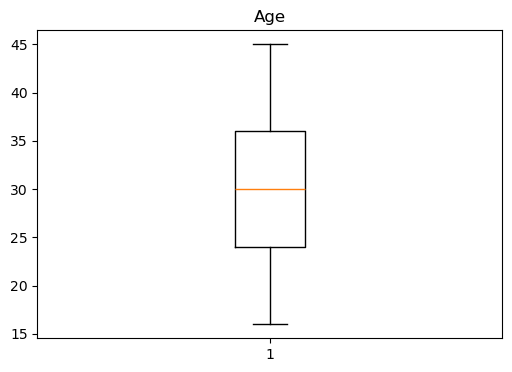

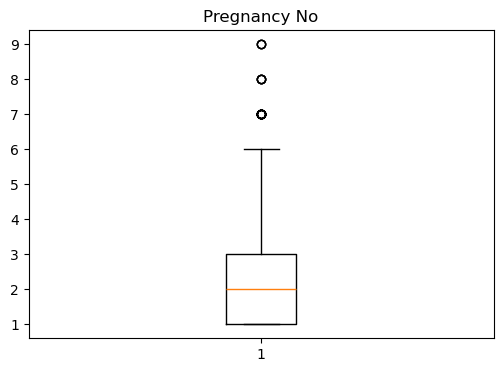

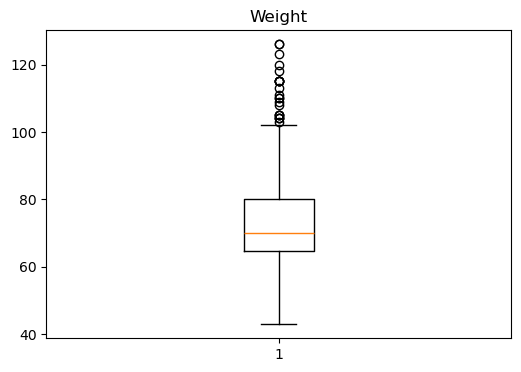

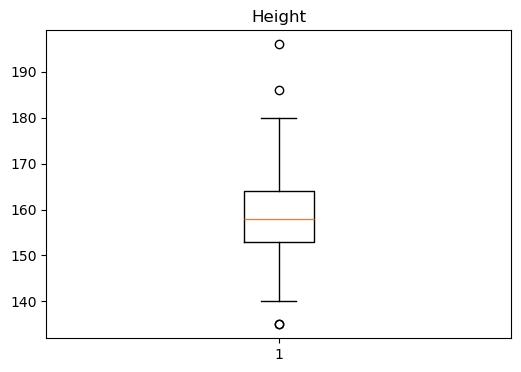

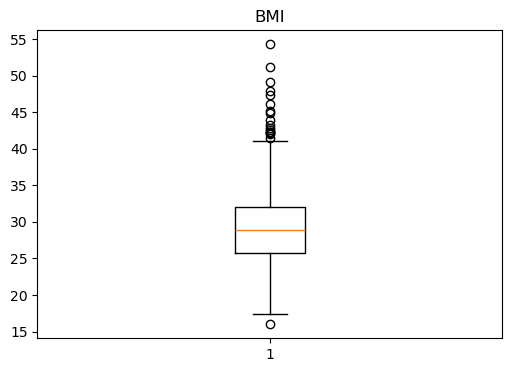

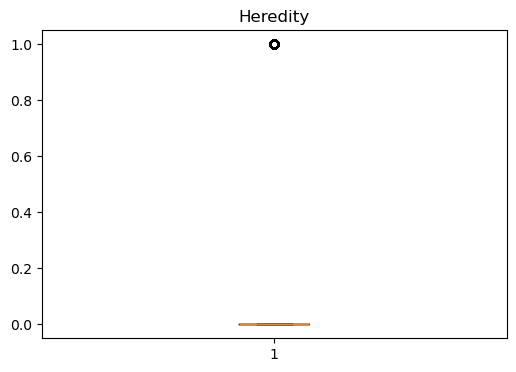

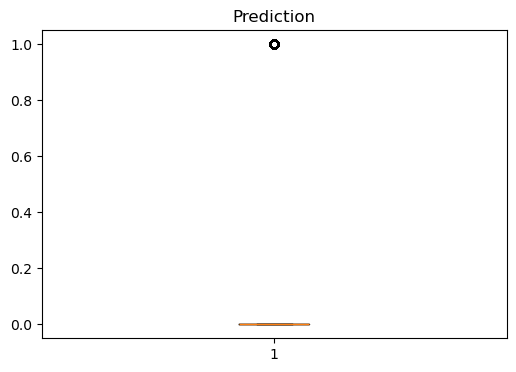

<Figure size 640x480 with 0 Axes>

In [17]:
for col in data.columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[col])
    plt.title(col)
    plt.show()
plt.tight_layout()

In [18]:
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Calculate Quartile Deviation
quartile_deviation = (Q3 - Q1) / 2

print("Interquartile Range (IQR):", IQR)
print("Quartile Deviation:", quartile_deviation)

Interquartile Range (IQR): 63.25
Quartile Deviation: 31.625


## Data Visualization

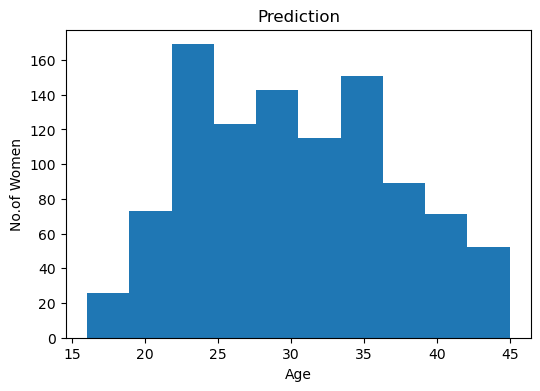

In [21]:
plt.figure(figsize=(6, 4))
plt.hist(data["Age"])
plt.title(col)
plt.ylabel("No.of Women")
plt.xlabel("Age")
plt.show()

<Axes: >

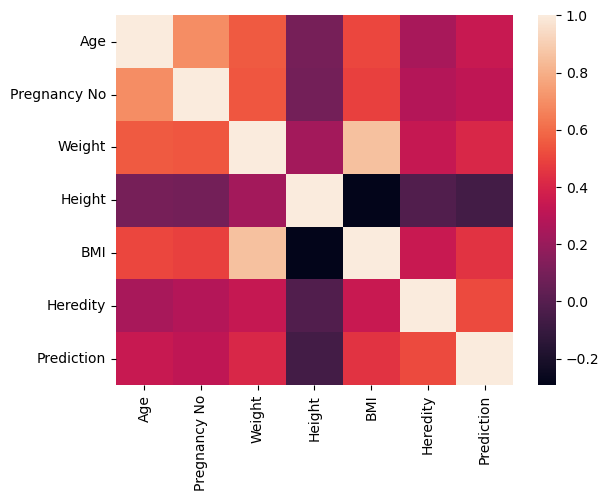

In [22]:
sns.heatmap(data.corr())

# Model Building Using Decision Tree Classifier

In [23]:
# Feature Selection
features = data[['Age', 'Pregnancy No', 'Weight', 'Height', 'BMI', 'Heredity']].copy()

In [24]:
#Target Variable
target = data[["Prediction"]].copy()

In [25]:
#Creating the features(X) and target(y) variables.
X = features
y = target

In [26]:
#Standard train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#DTC Model training
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [28]:
#Model Testing
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [29]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.812807881773399

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       153
           1       0.67      0.48      0.56        50

    accuracy                           0.81       203
   macro avg       0.76      0.70      0.72       203
weighted avg       0.80      0.81      0.80       203



In [31]:
questions = ['Age', 'Pregnancy No', 'Weight', 'Height', 'BMI', 'Heredity']
answers = []
print("Please enter the following details: ")
for i in questions:
    print(i, ": ", end="")
    temp = float(input())
    answers.append(temp)

report = {}

for key in questions:
    for value in answers:
        report[key] = value
        answers.remove(value)
        break

Please enter the following details: 
Age : 

 34


Pregnancy No : 

 2


Weight : 

 45


Height : 

 145


BMI : 

 19


Heredity : 

 1


In [32]:
# Convert dictionary(report) to DataFrame(patient_df)
patient_df = pd.DataFrame([report])

# Make a prediction
prediction = model.predict(patient_df)

# Display the result
if prediction[0] == 0:
    print("The patient is healthy.")
else:
    print("Gestational Diabetes Predicted.")

Gestational Diabetes Predicted.


In [34]:
#Extracting Model For Website Integration
from joblib import dump
dump(model, 'gestational.joblib')

['gestational.joblib']

# Terminated